# Model Training
* Model training is the process of developing a machine learning model by learning patterns from a dataset
### 1.1 Import Data and Required Packages

In [3]:
# Important Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# Modelling Libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [6]:
X = df.drop(columns= ['math score'], axis= 1)           # Dropping target variable
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
# Unique values in each columns
for i in df.columns:
    if df[i].dtype == 'object':
        print(f"Categories in '{i}' variable are: {df[i].unique()}")

Categories in 'gender' variable are: ['female' 'male']
Categories in 'race/ethnicity' variable are: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable are: ['standard' 'free/reduced']
Categories in 'test preparation course' variable are: ['none' 'completed']


In [8]:
y = df['math score']            # Target variable
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

#### Create column transformer with 2 types of transformers

In [9]:
num_features = X.select_dtypes(exclude="object").columns        # Ensure only non-categorical data types are selected (i.e. numerical)
cat_features = X.select_dtypes(include="object").columns        # Ensure only categorical data types are selected (i.e. non-numerical)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Defining Transformations
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
# Create column transformer with two transformations
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),        # Encoding categorical features
        ("StandardScaler", numeric_transformer, num_features),  # Scaling numerical features          
    ]
)

In [10]:
X = preprocessor.fit_transform(X)           # performs both fitting and transformation in a single step
# fit() --> Learns the transformations
# transform() --> Applies those learned transformations to X (object)

In [11]:
X.shape

(1000, 19)

#### Split dataset into Train and Test set

In [12]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print(f'Train Set Shape: {X_train.shape} Test Set Shape: {X_test.shape}')

Train Set Shape: (800, 19) Test Set Shape: (200, 19)


#### Create an Evaluate Function to give all metrics after model Training
* The **evaluate_model** function calculates key regression evaluation metrics to measure how well a machine learning model predicts numerical values

In [13]:
def evaluate_model(true, predicted):                    # (y_test, predicted)
    mae = mean_absolute_error(true, predicted)          # Measures absolute differences
    mse = mean_squared_error(true, predicted)           # Penalizes larger errors
    rmse = np.sqrt(mean_squared_error(true, predicted)) # Root of MSE for interpretability
    r2_square = r2_score(true, predicted)               # Measures model goodness-of-fit
    return mae, rmse, r2_square

In [14]:
# Define a dictionary of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []             # To store model names
r2_list =[]                 # To store R^2 scores

for i in range(len(list(models))):
    model = list(models.values())[i]        # Retrieve model instance
    model.fit(X_train, y_train)             # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    # Evaluate Test dataset 
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    # Display model performance metrics
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-'*35)
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804




Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7088
- Mean Absolute Error: 4.5177
- R2 Score: 0.8554
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2494
- Mean Absolute Error: 5.6090
- R2 Score: 0.7840


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
------------------------

## Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.854857
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.849978
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.784030
4,Decision Tree,0.757272


## Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


## Plot y_pred and y_test

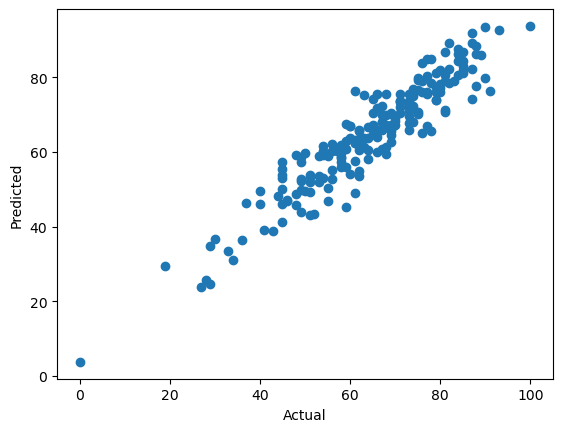

In [17]:
# To visualize actual vs predicted values
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math score'>

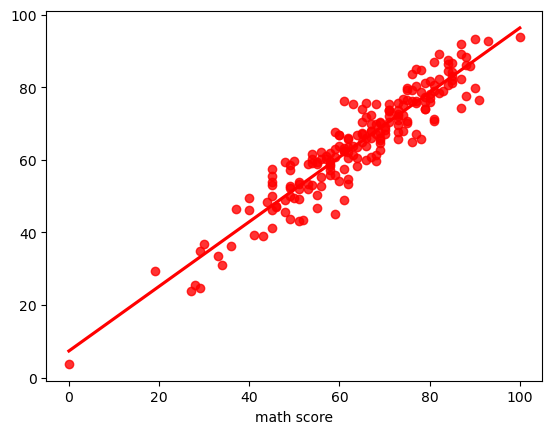

In [18]:
# Regression plot for actual vs predicted values
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

### Difference between Actual and Predicted Values

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
